# Introduction to Python, Numpy, Pandas, and Matplotlib


This lab will detail some pythonic equivalents to the `Introduction to R` lab of [ISL](http://faculty.marshall.usc.edu/gareth-james/ISL/).

This lab **will not** be an exhaustive tutorial of Python, Numpy, Pandas, or Matplotlib -- I myself still have plenty to learn about each :)

However, I hope that by the end of this lab you'll know how to do in python-land the same things the first lab of ISL does in R-land. Thanks, and good luck!

## Basic Commands

To create a list of numbers, we can use the syntax [1,2,3...] and optionally save this list to a variable

In [13]:
myList = [1,3,2,5]
myList

[1, 3, 2, 5]

* note that in a jupyter notebook, the last expression in a code cell will get printed

You can use the help() built-in python function for help, or check the python manual for guidance if you need.

In [14]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



Where R supports element-by-element vector addition out of the box, python's default for list addition is to concatenate the two lists

In [15]:
[1,3,5] + [2,4,6]

[1, 3, 5, 2, 4, 6]

If we instead want `[a,b,c] + [d,e,f]` to return `[a+d, b+e, c+f]`, we can use numpy arrays.

In [16]:
# import the numpy library, and alias it as np
import numpy as np

# instantiate a numpy array by wrapping a list in np.array()
first = np.array([1,3,5])
second = np.array([2,4,6])

firstPlusSecond = first + second
firstPlusSecond

array([ 3,  7, 11])

You can check the length of python lists using `len()` or numpy arrays using `len()` or alternatively `.shape()`

In [17]:
print(len([1,2,3]))
print(np.array([4,2,4,2,4]).shape) 

3
(5,)


Generally, numpy arrays need to be the same length to be added together.

In [18]:
# np.array([1,3,5]) + np.array([2,4])
# ValueError: operands could not be broadcast together with shapes (3,) (2,) 

This isn't the whole story -- numpy will try to make sense of operations you give it.
But in general, you'll want to add together arrays with matching shapes.
If you want to see a result I found interesting, try uncommenting the last line of the following code cell

In [19]:
first = np.array([1,1,1]) # sort of like the matrix row [1,1,1]
second = np.array([[2], [3], [4]]) # this is more like a column
print('first:')
print(first)
print(first.shape)

print('-----------')
print('second:')
print(second)
print(second.shape)
#first + second

first:
[1 1 1]
(3,)
-----------
second:
[[2]
 [3]
 [4]]
(3, 1)


In R, the `ls()` function will list all the objects saved in a session.
Python has similar commands in `dir()`, `locals()`, and `globals()`

(figure out a better way to word this)
However, these also list python global objects, not just user-defined ones. 

Because this is a Jupyter notebook, we can use the `%who` magic to see only user-defined objects

In [20]:
%who

first	 firstPlusSecond	 myList	 np	 second	 x	 


I don't know if it's all that [pythonic](https://docs.python-guide.org/writing/style/) to "undeclare" your variables, but you're certainly allowed to using `del`.
I haven't been able to find an equivalent to R's removal of all user-defined objects, but I'm sure it can be done. (the mathematician in me is always happy to say ["a solution exists!"](https://users.cs.northwestern.edu/~riesbeck/mathphyseng.html#fire) and walk away)

In [21]:
del myList
# myList
# NameError: name 'myList' is not defined

To create a matrix in numpy, you'll still use np.array, but you'll pass it an array of arrays.
* there is a numpy.matrix class, however numpy explicitly suggests not using it going forward

In [22]:
matrix = np.array([[1,2], [3, 5]])
matrix

array([[1, 2],
       [3, 5]])

Python and R are similar in that their functions can be called with named arguments.
Calling a function without named arguments (which is all we've seen in this notebook so far)
causes the arguments to be used positionally. 

    ex. np.array() takes a handful of arguments, but the first two are object and dtype
    object is the "array-like" thing we want to put into the numpy array, and dtype specifies the type we want for our array
    by leaving off the name in the above calls, np.array([1,2,3]) calls the function with [1,2,3] as the "object" argument.
    Not specifying the dtype argument causes it to default to whatever numpy deems fit -- be sure to read the results from
    help(np.array) if you need.
    We can use these named arguments to supply whichever arguments we want, in whatever order we want

In [24]:
# normally object is the first arg and dtype is second. flipping them around as is will throw an error
# np.array(int, [1,2,3])
# TypeError: data type not understood

In [25]:
# we can accomplish this using named arguments
np.array(dtype=int, object=[1,2,3])

array([1, 2, 3])

Numpy provides plenty of functions that can be used to modify arrays.
np.sqrt(array) will return a numpy array with the square root of each original element
np.power(array, exp) will return a numpy array with the `exp` power of each element

In [26]:
print(np.sqrt([[81, 64], [49, 36]]))
print('-----------')
print(np.power([2,4,6], 2))

[[9. 8.]
 [7. 6.]]
-----------
[ 4 16 36]


the function `np.random.normal(loc, scale, size)` generates a vector of random normal variables, with third argument `size` the sample size.

`loc` specifies the mean of the distribution, and `scale` specifies the standard deviation.
Note that every time we call this function, we'll get a different array.

In [27]:
np.random.normal(size=50)

array([-0.95737631, -0.27608195, -1.11803916, -0.45944095,  0.29512705,
        0.3959518 , -1.0212306 , -1.08643221, -0.17849688, -1.3865012 ,
        0.61773223,  0.26770407, -1.52713919,  0.00972941,  0.0652914 ,
        1.04250369, -0.15849767, -1.83571607,  0.49703923,  0.65929168,
       -0.97876932,  0.14706426, -0.33232559,  1.92952484, -0.32420867,
        0.0879289 ,  0.38090567, -0.27685386,  2.03706721, -1.72007668,
        0.07628116,  2.38040957,  1.27791481,  0.03528034,  0.41349876,
       -0.6730669 ,  0.46250824,  1.27131771, -1.37906673,  0.21825048,
       -0.13921041,  0.77911962,  0.33497397,  0.69652303,  0.64301043,
        1.24151846,  0.39151702, -0.3036621 , -0.96110879,  0.42141645])

In [28]:
# we can use the corrcoef function to compute the correlation between two arrays
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale=0.1, size=50)
# the [0, 1] will explained in the `Indexing` section of this notebook
np.corrcoef(x,y)[0, 1] # correlation should be in the ballpark of 0.95

0.9904806493835737

We may want our code to reproduce the exact same set of "random" numbers when we use random.normal

We can do this by setting a random seed.
- Note this doesn't mean calling np.random.normal two times in a row will produce the exact same array. Instead it means the next time this code is run, x will be the same as it was the first time, as will y.

In [29]:
np.random.seed(28)

x = np.random.normal(size=10) # now the first element of x will always be 0.44633238

y = np.random.normal(size=10) # now the first element of y will always be 0.25350786

# now every time this notebook is run, 
# x will be the same as it was the first time I ran it,
# and y will be the same as it was the first time I ran it.
# x and y, however, will not be the same:
x == y

array([False, False, False, False, False, False, False, False, False,
       False])

We can use np.mean, np.var, and np.std to compute the respective mean, variance, and standard deviation of an array

In [30]:
np.random.seed(15)
x = np.random.normal(loc=15, scale=10, size=1000)
print(np.mean(x)) # turns out close to 15, like we expect, since our array is centered around 15
print(np.std(x)) # turns out close to 10
print(np.var(x)) # turns out close to 100, the square of our standard deviation

14.69387978301393
9.97661674803756
99.53288173722356


## Graphics

There are plenty of libraries out there that will help you plot data in python, but here we'll focus on the very popular Matplotlib.pyplot
You'll commonly see it aliased as `plt`

The `plot` function can be used to draw a line chart, while the `scatter` function draws a scatter plot.
There are tons of other functions Matplotlib provides, be sure to investigate it, as well as other plotting libraries!

`Seaborn` is another popular python plotting pick.

- TODO: explain list comprehension

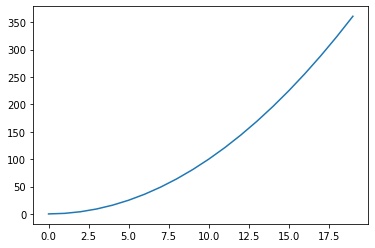

In [31]:
import matplotlib.pyplot as plt

xs = list(range(20))

# this is called a list comprehension, it's a pythonic way of populating an array, frequently from another iterable
ys = [x**2 for x in xs]
plt.plot(xs, ys)

If you want to spruce up your plots (and you should, you deserve it) matplotlib provides options to change the colors and styles in your plots, and functions like `title` to describe your plot.

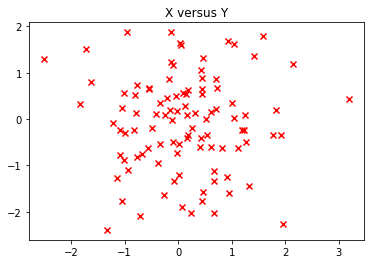

In [32]:
np.random.seed(23)

x = np.random.normal(size=100)
y = np.random.normal(size=100)

plt.title('X versus Y')
plt.scatter(x, y, c='red', marker='x')

I couldn't hope to detail all the things matplotlib will let you do to your plots, or how to do them. Documentation is your friend here!

All I ask is that you don't break the rule I've already broken twice now:

**[Always label your axes](https://flowingdata.com/2012/06/07/always-label-your-axes/)**

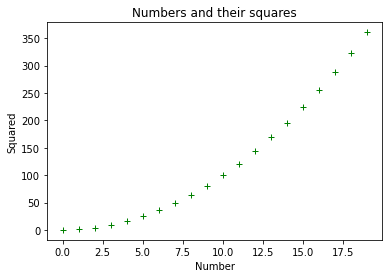

In [33]:
plt.xlabel('Number')
plt.ylabel('Squared')
plt.title('Numbers and their squares')
plt.plot(xs, ys, 'g+')

You can use the `savefig` function to save your plot in a handful of different formats

In [ ]:
plt.savefig('squares.pdf') # just name it with your chosen extension. pdf, jpg, png...

`list(range(a, b))` will return a list of integers, starting with a and ending with (but not including!) b

You can set a third argument, `step`, to jump integers.

Ex. list(range(2, 21, 3)) starts with 2, then picks the 3rd next integer 5, then the 3rd next integer 8...

You'll likely use the `range` function in for loops, but for generating sequences you'll more likely use numpy, because the range step size can only be an integer

In [34]:
print(list(range(1, 11)))
print(list(range(2, 21, 3)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 5, 8, 11, 14, 17, 20]


Numpy provides a function `linspace` we can use to create a sequence of numbers with decimal step sizes.

`np.linspace(a, b, num)` will return 'num' numbers evenly spaced between a and b (inclusive)

In [49]:
print(np.linspace(0, 1, 11))
x = np.linspace(-np.pi, np.pi, 50)
x.shape

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


(50,)

We can create a contour plot using `plt.contour`, then label the contour lines with `plt.clabel`
Note the use of broadcasting here in `y[:, None]`.

You'll get an error if you don't broadcast either of `x` or `y` below.

I'll be honest, the need for broadcasting was a bit confusing to me at first, just know that the function below matches 
$$ z = \frac{cos(y)}{1 + x^2} $$

<a list of 11 text.Text objects>

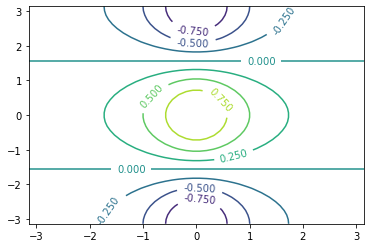

In [59]:
y = x
z = np.cos(y[:, None]) / (1 + x**2)
cs = plt.contour(x,y,z)
plt.clabel(cs)

Use `array.T` to get the transpose of a numpy array.

In [60]:
fa = (z - z.T) / 2

Use `imshow` with args `cmap='hot'` and `interpolation='nearest'` to create a heatmap

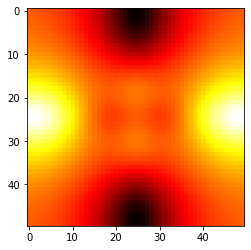

In [61]:
plt.imshow(fa, cmap='hot', interpolation='nearest')

Suppose we have a matrix A:

I used the `linspace` method to get the numbers 1 through 16 into an array,
`reshape` to put them into a 4x4 matrix, and
`.T` to make the matrix match the R book :)

In [68]:
A = np.linspace(1, 16, 16).reshape(4,4).T
A

array([[ 1.,  5.,  9., 13.],
       [ 2.,  6., 10., 14.],
       [ 3.,  7., 11., 15.],
       [ 4.,  8., 12., 16.]])

## Indexing Data

I'll actually do a different section for indexing data in pandas, but here we'll see how to access data in numpy arrays.

Where R is has 1-indexed arrays (array[1] gives the first element)

Python is 0-indexed (so is numpy by extension)

So to get the element in the second row and third column of our numpy matrix (which is really an array of arrays......... I should explain that better) we use `A[1,2]`. The first number corresponds to which row you're selecting and the second corresponds to the column.

In [70]:
A[1,2]

10.0

You can also select multiple rows and columns at a time, although I have to admit R has the simple syntax advantage here.

I actually just learned a few things about numpy indexing, thanks to its documentation and [this stackOverflow answer](https://stackoverflow.com/questions/22927181/selecting-specific-rows-and-columns-from-numpy-array)

In this example I select the first and third rows (indexed at 0 and 2) and the second and fourth columns (indexed at 1 and 3) of A.

In [80]:
A[[[0], [2]], [1, 3]]

array([[ 5., 13.],
       [ 7., 15.]])

Using `a:b` syntax you can select ranges of indices. Just be wary that `a:b` includes `a` but **excludes** `b` 

In [85]:
A[0:3, 1:4] # select first-to-third rows and second-to-fourth columns

array([[ 5.,  9., 13.],
       [ 6., 10., 14.],
       [ 7., 11., 15.]])

If you want to get all rows or all columns, use `:` as the corresponding argument

In [87]:
A[:, 0] # all entries from the first column

array([1., 2., 3., 4.])

In [90]:
A[3, :] # all entries from the fourth row

array([ 4.,  8., 12., 16.])

Numpy doesn't appear to have a built-in way of excluding certain indices the same way R does, however `np.delete` does something similar. Note this creates a *new* array with the chosen indices excluded 

In [99]:
arr = np.array([1,2,3,4,5])
evens = [1, 3] # indices of 2 and 4 in arr
new_arr = np.delete(arr, evens)
print(arr) # arr is unchanged
print(new_arr) # and new_arr excluded the indices

[1 2 3 4 5]
[1 3 5]


In [91]:
A.shape # we've seen this before -- use .shape to find how many rows and columns are in a numpy array of arrays

(4, 4)

Much more often in numpy and pandas, you'll use _boolean indexing_ to select elements.

This works by using an array of booleans as the index argument in the square brackets. 
Any of the indices in the boolean array with `True` as the value will select the corresponding element in the original array.

Note: the boolean array has the same length as the array you're trying to index

In [109]:
bools = [True, False, True, True, False] # want to select the first, third, and fourth entries in the array
arr[bools]


array([1, 3, 4])

## Loading Data

If all you really want to do is load a csv file, you can always use the `csv` library.

However, for the purposes of this book, you'll more likely want to use `pandas` for both loading the csv file and working with the resulting data.

You can use `pd.read_csv` to parse a csv file into a `pandas Dataframe`, a table of sorts with plenty of helpful methods for data processing.

`Dataframe.head()` will show you the first 5 rows of the dataframe

In [117]:
import pandas as pd # you'll frequently see pandas aliased as pd
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
2,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320"
3,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite"
4,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst"
5,17.0,8,302.0,140.0,3449,10.5,70,1,"ford,torino"


In [119]:
auto.shape

(397, 9)

Indexing in pandas works a bit differently from numpy. If you want to get all the data in a column or columns, you can provide the column names in the square brackets:

In [122]:
auto['mpg'] # this returns a pandas Series

1      18.0
2      15.0
3      18.0
4      16.0
5      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 397, dtype: float64

In [127]:
auto[['cylinders', 'horsepower']] # this returns a Dataframe

,cylinders,horsepower
1,8,130.0
2,8,165.0
3,8,150.0
4,8,150.0
5,8,140.0
...,...,...
393,4,86.0
394,4,52.0
395,4,84.0
396,4,79.0


If you want to grab things by index, use `iloc[]`. iloc uses an indexing syntax based on numpy's indexing:

In [130]:
auto.iloc[1:4,] # TODO: explain this better :)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
2,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320"
3,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite"
4,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst"


Most commonly though, you'll probably be using boolean indexing in pandas, just like highlighted in numpy indexing.

In [138]:
# a boolean index where the 'name' value of a row matches 'chevrolet,chevelle,malibu'
name_match = (auto['name'] == 'chevrolet,chevelle,malibu')
auto[name_match]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
36,17.0,6,250.0,100.0,3329,15.5,71,1,"chevrolet,chevelle,malibu"


There's a ton more to cover on pandas indexing, but what I've briefly covered above gets us to parity with ISL, and I'll be sure to highlight later any other indexing tricks that may occur.

You can see the names of the columns in the `.columns` attribute of a dataframe

In [132]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [141]:
auto.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
2,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320"
3,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite"
4,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst"
5,17.0,8,302.0,140.0,3449,10.5,70,1,"ford,torino"
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,"ford,mustang,gl"
394,44.0,4,97.0,52.0,2130,24.6,82,2,"vw,pickup"
395,32.0,4,135.0,84.0,2295,11.6,82,1,"dodge,rampage"
396,28.0,4,120.0,79.0,2625,18.6,82,1,"ford,ranger"


In [143]:
# dropna() defaults to dropping any rows with missing data, but providing the axis=1 arg will instead drop columns with missing data
# note this method returns a *new* dataframe -- the original is not affected unless you use inplace=True as an arg
auto.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
2,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320"
3,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite"
4,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst"
5,17.0,8,302.0,140.0,3449,10.5,70,1,"ford,torino"
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,"ford,mustang,gl"
394,44.0,4,97.0,52.0,2130,24.6,82,2,"vw,pickup"
395,32.0,4,135.0,84.0,2295,11.6,82,1,"dodge,rampage"
396,28.0,4,120.0,79.0,2625,18.6,82,1,"ford,ranger"


## Additional Graphical and Numerical Summaries

Pandas has some built-in functions that use matplotlib under the hood.

Some are accessed through the `plot` property of a DataFrame or Series, and some are accessed directly -- be sure to refer to the documentation, and maybe check out seaborn or other visualization libraries.

One way of making a scatterplot from a dataframe is to call the `plot.scatter` function, passing in the columns you want for the x and y axes

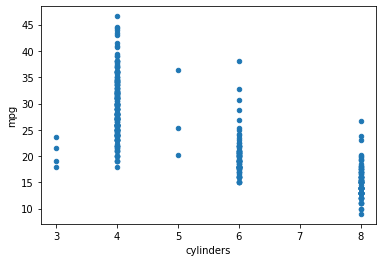

In [149]:
auto.plot.scatter('cylinders', 'mpg')

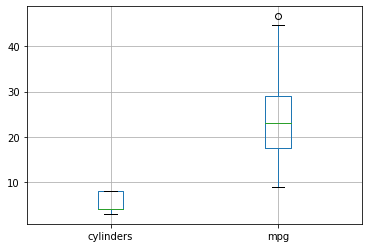

In [151]:
auto.boxplot(column=['cylinders', 'mpg'])

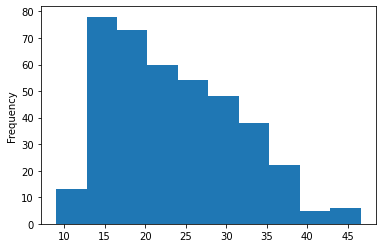

In [154]:
auto['mpg'].plot.hist()